In [92]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [98]:
aal = pd.read_csv("PEP.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [99]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day
0,2012-01-04,50.268084,50.593560,50.048572,50.517868,6042400,0.0,0,0.075340,0.794150,...,0.683808,1.353597,0.628258,0.685570,1.357084,50.260509,50.245384,48.511993,45.386585,47.998550
1,2012-01-05,50.396776,50.464898,50.048587,50.124279,4909100,0.0,0,0.512049,0.746331,...,0.684073,1.364754,0.544989,0.684617,1.365838,50.517868,49.889603,48.655815,45.266453,48.864433
2,2012-01-06,50.162107,50.162107,49.420314,49.496006,6533000,0.0,0,-0.779109,0.631504,...,0.676806,1.367396,0.416311,0.682425,1.378747,50.124279,50.366505,48.746643,45.476677,49.047905
3,2012-01-09,49.397608,49.829061,49.208374,49.753368,5859600,0.0,0,-1.253431,0.712966,...,0.681445,1.369645,0.741793,0.683709,1.374196,49.496006,50.222672,48.935879,45.814545,48.717693
4,2012-01-10,49.942609,49.995594,49.556570,49.700390,4996000,0.0,0,0.519966,0.739267,...,0.684559,1.377372,0.620687,0.684512,1.377277,49.753368,50.260509,49.132687,46.452740,48.468182


In [100]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
0,2012-01-04,50.517868,6042400,0.0,0,0.075340,0.794150,0.993258,1.072002,1.547398,...,1.353597,0.628258,0.685570,1.357084,50.260509,50.245384,48.511993,45.386585,47.998550,NaN
1,2012-01-05,50.124279,4909100,0.0,0,0.512049,0.746331,0.993285,1.071901,0.018792,...,1.364754,0.544989,0.684617,1.365838,50.517868,49.889603,48.655815,45.266453,48.864433,1.078804
2,2012-01-06,49.496006,6533000,0.0,0,-0.779109,0.631504,0.999646,1.067171,0.294372,...,1.367396,0.416311,0.682425,1.378747,50.124279,50.366505,48.746643,45.476677,49.047905,0.830558
3,2012-01-09,49.753368,5859600,0.0,0,-1.253431,0.712966,1.002963,1.069913,-0.253696,...,1.369645,0.741793,0.683709,1.374196,49.496006,50.222672,48.935879,45.814545,48.717693,1.498694
4,2012-01-10,49.700390,4996000,0.0,0,0.519966,0.739267,1.004368,1.069521,0.226160,...,1.377372,0.620687,0.684512,1.377277,49.753368,50.260509,49.132687,46.452740,48.468182,1.247527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2021-07-26,157.070007,2999800,0.0,0,1.282293,0.813551,0.745698,1.004729,1.014545,...,1.062555,2.549988,2.106293,1.340990,157.179993,155.800003,144.850006,142.320251,132.105362,1.622336
2405,2021-07-27,157.940002,4043900,0.0,0,-0.069974,0.820006,0.729310,1.003446,0.238220,...,1.040367,1.440002,2.099486,1.329293,157.070007,155.820007,145.669998,141.853653,133.668564,0.916790
2406,2021-07-28,156.490005,3556800,0.0,0,0.553890,0.523986,0.730570,1.001455,-0.471244,...,1.047919,1.630005,2.094742,1.338579,157.940002,155.240005,146.410004,140.801346,133.386993,1.032041
2407,2021-07-29,156.809998,3055600,0.0,0,-0.918068,0.589091,0.746616,1.003238,-0.018626,...,1.055980,2.050003,2.097098,1.337349,156.490005,155.190002,147.039993,142.896042,133.920990,1.309990


In [101]:
aal1 = aal1.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [29]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

78


C:\Users\monis\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\monis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


41


,VIF
Volume,1.700309
Dividends,1.028682
daily_returns,8.663699
std_10,14.995112
std_45,48.754773
std_252,71.270861
market_daily_returns,1.962856
beta,9.228522
residual_volatility,19.256694
ER_10,27.274280


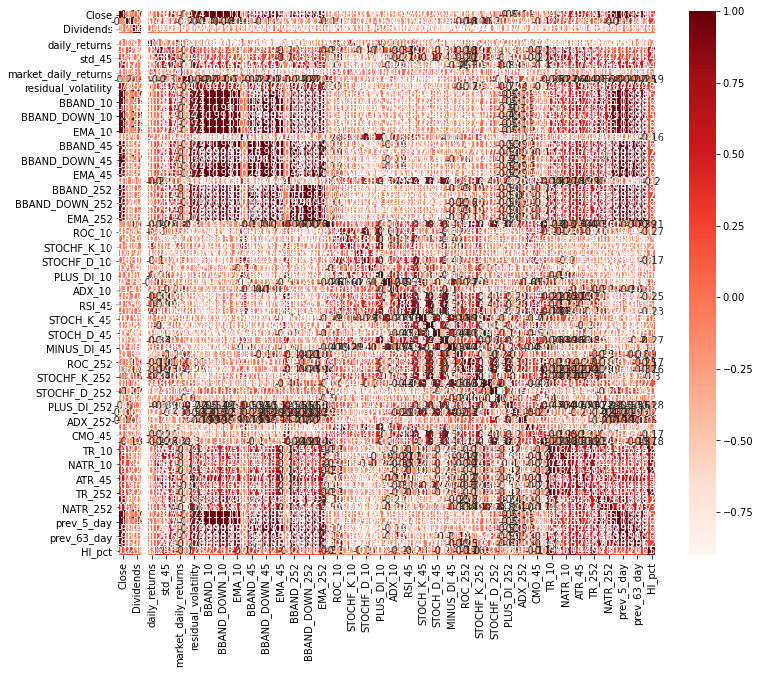

In [102]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [103]:
aal1

,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,beta,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,50.517868,6042400,0.0,0,0.075340,0.794150,0.993258,1.072002,1.547398,0.209200,...,1.353597,0.628258,0.685570,1.357084,50.260509,50.245384,48.511993,45.386585,47.998550,NaN
2012-01-05,50.124279,4909100,0.0,0,0.512049,0.746331,0.993285,1.071901,0.018792,0.209151,...,1.364754,0.544989,0.684617,1.365838,50.517868,49.889603,48.655815,45.266453,48.864433,1.078804
2012-01-06,49.496006,6533000,0.0,0,-0.779109,0.631504,0.999646,1.067171,0.294372,0.208333,...,1.367396,0.416311,0.682425,1.378747,50.124279,50.366505,48.746643,45.476677,49.047905,0.830558
2012-01-09,49.753368,5859600,0.0,0,-1.253431,0.712966,1.002963,1.069913,-0.253696,0.208676,...,1.369645,0.741793,0.683709,1.374196,49.496006,50.222672,48.935879,45.814545,48.717693,1.498694
2012-01-10,49.700390,4996000,0.0,0,0.519966,0.739267,1.004368,1.069521,0.226160,0.208648,...,1.377372,0.620687,0.684512,1.377277,49.753368,50.260509,49.132687,46.452740,48.468182,1.247527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,157.070007,2999800,0.0,0,1.282293,0.813551,0.745698,1.004729,1.014545,0.712367,...,1.062555,2.549988,2.106293,1.340990,157.179993,155.800003,144.850006,142.320251,132.105362,1.622336
2021-07-27,157.940002,4043900,0.0,0,-0.069974,0.820006,0.729310,1.003446,0.238220,0.712753,...,1.040367,1.440002,2.099486,1.329293,157.070007,155.820007,145.669998,141.853653,133.668564,0.916790
2021-07-28,156.490005,3556800,0.0,0,0.553890,0.523986,0.730570,1.001455,-0.471244,0.708101,...,1.047919,1.630005,2.094742,1.338579,157.940002,155.240005,146.410004,140.801346,133.386993,1.032041


In [104]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [105]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [106]:
print(len(aal1.columns), len(rel_feat))

75 38


In [70]:
#aal_df = aal1.copy()

In [36]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [55]:
aal_close_px = aal_df['Close']

In [56]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


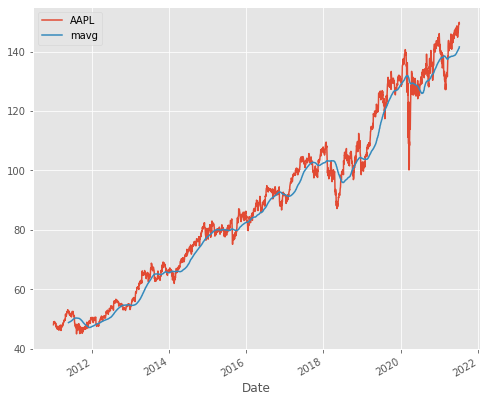

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

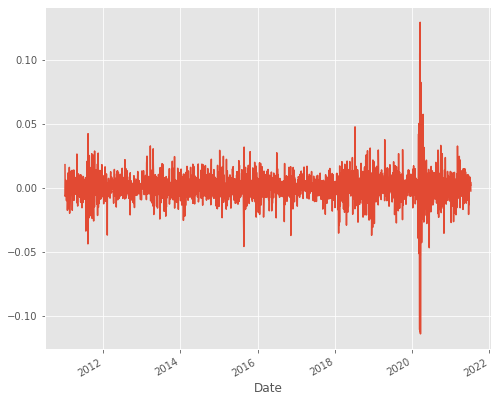

In [58]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [107]:
aal_df = aal_df.iloc[1:]

In [17]:
# aal_df = aal_df.set_index("Date")

In [18]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [19]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [20]:
# g_all

In [21]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [108]:
# training test split
key = pd.Timestamp(2017, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [109]:
# aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,Close,std_45,std_252,beta,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,BBAND_DOWN_10,SMA_10,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,50.124279,0.993285,1.071901,0.209151,0.422801,50.386667,50.146974,50.699352,49.594597,50.146974,...,1.364754,0.544989,0.684617,1.365838,50.517868,49.889603,48.655815,45.266453,48.864433,1.078804
2012-01-06,49.496006,0.999646,1.067171,0.208333,0.415945,50.212588,50.199205,50.600720,49.797689,50.199205,...,1.367396,0.416311,0.682425,1.378747,50.124279,50.366505,48.746643,45.476677,49.047905,0.830558
2012-01-09,49.753368,1.002963,1.069913,0.208676,0.420958,49.692809,50.150003,50.741955,49.558052,50.150003,...,1.369645,0.741793,0.683709,1.374196,49.496006,50.222672,48.935879,45.814545,48.717693,1.498694
2012-01-10,49.700390,1.004368,1.069521,0.208648,0.420086,49.596934,50.126538,50.763890,49.489186,50.126538,...,1.377372,0.620687,0.684512,1.377277,49.753368,50.260509,49.132687,46.452740,48.468182,1.247527
2012-01-11,49.208385,1.002229,1.069031,0.207919,0.419724,49.750851,50.057658,50.717344,49.397973,50.057658,...,1.386558,0.439024,0.684856,1.391747,49.700390,50.517868,48.693661,45.761997,48.673645,0.883341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,157.070007,0.745698,1.004729,0.712367,0.653416,156.736664,154.731001,158.983224,150.478779,154.731001,...,1.062555,2.549988,2.106293,1.340990,157.179993,155.800003,144.850006,142.320251,132.105362,1.622336
2021-07-27,157.940002,0.729310,1.003446,0.712753,0.653356,156.856669,155.487003,157.907268,153.066737,155.487003,...,1.040367,1.440002,2.099486,1.329293,157.070007,155.820007,145.669998,141.853653,133.668564,0.916790
2021-07-28,156.490005,0.730570,1.001455,0.708101,0.653250,157.876668,155.985002,158.127821,153.842184,155.985002,...,1.047919,1.630005,2.094742,1.338579,157.940002,155.240005,146.410004,140.801346,133.386993,1.032041


In [110]:
aal_df.isna().sum()

Close                  0
std_45                 0
std_252                0
beta                   0
residual_volatility    0
Typical Price          0
BBAND_10               0
BBAND_UP_10            0
BBAND_DOWN_10          0
SMA_10                 0
EMA_10                 0
BBAND_45               0
BBAND_UP_45            0
BBAND_DOWN_45          0
SMA_45                 0
EMA_45                 0
BBAND_252              0
BBAND_UP_252           0
BBAND_DOWN_252         0
SMA_252                0
EMA_252                0
PLUS_DI_252            0
MINUS_DI_252           0
TR_10                  0
ATR_10                 0
NATR_10                0
TR_45                  0
ATR_45                 0
NATR_45                0
TR_252                 0
ATR_252                0
NATR_252               0
prev_day               0
prev_5_day             0
prev_22_day            0
prev_63_day            0
prev_252_day           0
Hl_pct                 0
dtype: int64

In [93]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [94]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [95]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [111]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<ipython-input-111-57b427f81183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain.dropna(inplace=True)


In [112]:
cols = xtrain.columns
cols

Index(['EMA_252', 'prev_22_day', 'Hl_pct', 'SMA_252', 'BBAND_DOWN_252',
       'BBAND_252', 'MINUS_DI_252', 'ATR_45', 'PLUS_DI_252', 'TR_45',
       'prev_252_day', 'prev_63_day', 'std_252', 'ATR_252', 'BBAND_45',
       'TR_10', 'std_45', 'BBAND_DOWN_10', 'residual_volatility', 'TR_252',
       'beta', 'ATR_10', 'prev_5_day', 'BBAND_UP_10', 'Typical Price',
       'BBAND_10', 'SMA_10', 'EMA_45', 'NATR_252', 'BBAND_DOWN_45', 'prev_day',
       'BBAND_UP_252', 'NATR_45', 'BBAND_UP_45', 'SMA_45', 'EMA_10',
       'NATR_10'],
      dtype='object')

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [114]:
xtrain

array([[-1.54794035, -1.67315789, -0.02793212, ..., -1.68887527,
        -1.62218337, -0.13229405],
       [-1.54692391, -1.6675379 , -0.41347875, ..., -1.68493221,
        -1.62129278, -0.36265565],
       [-1.54623527, -1.6558289 ,  0.62419196, ..., -1.68110998,
        -1.6276174 , -0.40493784],
       ...,
       [ 1.77998338,  1.72278531, -0.61916669, ...,  1.68854018,
         1.85916227, -0.47130466],
       [ 1.78379964,  1.72002276, -0.92230836, ...,  1.69893013,
         1.86914551, -0.65392649],
       [ 1.78760863,  1.77087513, -1.07879334, ...,  1.71053955,
         1.87781845, -0.73752141]])

In [115]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [116]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [117]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9884943505322389
The quadratic regression 2 confidence is  0.8713600014509678
The quadratic regression 3 confidence is  -51.87298855893073
The knn regression confidence is  -2.047118830090676


0.9907733679329749

In [118]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [119]:
forecast_set
Forecast['Forecast']

Date
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
2012-01-10   NaN
2012-01-11   NaN
              ..
2021-07-26   NaN
2021-07-27   NaN
2021-07-28   NaN
2021-07-29   NaN
2021-07-30   NaN
Name: Forecast, Length: 2408, dtype: float64

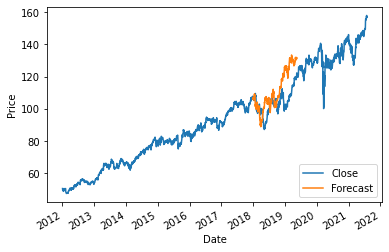

KeyError: 'Forecast'

In [120]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [121]:
print(next_unix)

2019-05-17 00:00:00


In [122]:
print(clfreg.coef_)

[-6.20071514e+00  4.62325526e-01  4.49403524e-01  2.32816352e+00
  1.24310371e+00  2.32816352e+00 -3.97289063e-02  1.02202533e+00
 -1.15771286e-01 -1.58931286e-01 -1.60948864e-01 -9.42460129e-02
  1.30754796e+00  6.73710818e-01  4.62115132e-01 -1.58931286e-01
 -7.93874275e-02  3.35633889e-02 -1.15193935e-01 -1.58931286e-01
 -1.09879153e-01  1.05165382e+00 -8.71157506e-02  2.83309765e-02
  2.48149448e+00  3.09411064e-02  3.09411064e-02 -4.27328533e+00
 -2.13084436e+00  9.44274998e-01  8.37625848e+00  3.26657981e+00
 -5.45275712e-01  4.19799233e-03  4.62115132e-01  2.77226917e+00
 -8.84875796e-01]


In [123]:
print(clfreg.intercept_)

76.52466530853657


In [124]:
xtrain.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [125]:
coeff = dict(zip(cols, clfreg.coef_))


In [126]:

coeff

{'EMA_252': -6.200715137550066,
 'prev_22_day': 0.4623255258723617,
 'Hl_pct': 0.4494035241424407,
 'SMA_252': 2.328163518814133,
 'BBAND_DOWN_252': 1.243103708975948,
 'BBAND_252': 2.328163518814098,
 'MINUS_DI_252': -0.03972890630695212,
 'ATR_45': 1.0220253263174293,
 'PLUS_DI_252': -0.11577128643478934,
 'TR_45': -0.15893128604523832,
 'prev_252_day': -0.16094886441553177,
 'prev_63_day': -0.09424601293726717,
 'std_252': 1.3075479575885873,
 'ATR_252': 0.6737108177299245,
 'BBAND_45': 0.46211513247894137,
 'TR_10': -0.15893128604523088,
 'std_45': -0.07938742745564882,
 'BBAND_DOWN_10': 0.033563388863668914,
 'residual_volatility': -0.11519393537882759,
 'TR_252': -0.1589312860452241,
 'beta': -0.10987915298609817,
 'ATR_10': 1.0516538216247788,
 'prev_5_day': -0.08711575061322939,
 'BBAND_UP_10': 0.02833097647742736,
 'Typical Price': 2.4814944820956057,
 'BBAND_10': 0.030941106444469804,
 'SMA_10': 0.030941106444469582,
 'EMA_45': -4.273285326608013,
 'NATR_252': -2.130844355761

In [128]:
factors = dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))
factors_dict = {"features":factors.keys(), "regression coeff":factors.values()}
factors_df = pd.DataFrame(factors_dict)

In [129]:
factors_df

,features,regression coeff
0,prev_day,8.376258
1,EMA_252,-6.200715
2,EMA_45,-4.273285
3,BBAND_UP_252,3.266580
4,EMA_10,2.772269
5,Typical Price,2.481494
6,SMA_252,2.328164
7,BBAND_252,2.328164
8,NATR_252,-2.130844
9,std_252,1.307548


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain